In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [286]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")
df

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [289]:
df.isna().sum()

datetime    0
total       1
dtype: int64

In [288]:
df['total'] = df['total'].fillna(df['total'].interpolate())

In [277]:
df['total'] = df['total'].fillna(df['total'].mean())

In [290]:
df

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380
...,...,...
35059,31.12.2008 19:00:00,249376.3608
35060,31.12.2008 20:00:00,246510.5725
35061,31.12.2008 21:00:00,226469.4133
35062,31.12.2008 22:00:00,199907.3942


In [242]:
df['Year'] = pd.to_datetime(df['datetime']).dt.year

In [243]:
df['mnth'] = pd.to_datetime(df['datetime']).dt.month

In [8]:
#df['Day'] = pd.to_datetime(df['datetime']).dt.day

In [244]:
df['DayOfWeek'] = pd.to_datetime(df['datetime']).dt.weekday

In [245]:
df['Time'] = pd.to_datetime(df['datetime']).dt.hour

In [246]:
df['Season'] = df['mnth']%12//3+1

In [247]:
df = pd.get_dummies(df,columns = ['mnth','DayOfWeek','Season'])


In [279]:
df['datetime'] = pd.to_datetime(df['datetime'])

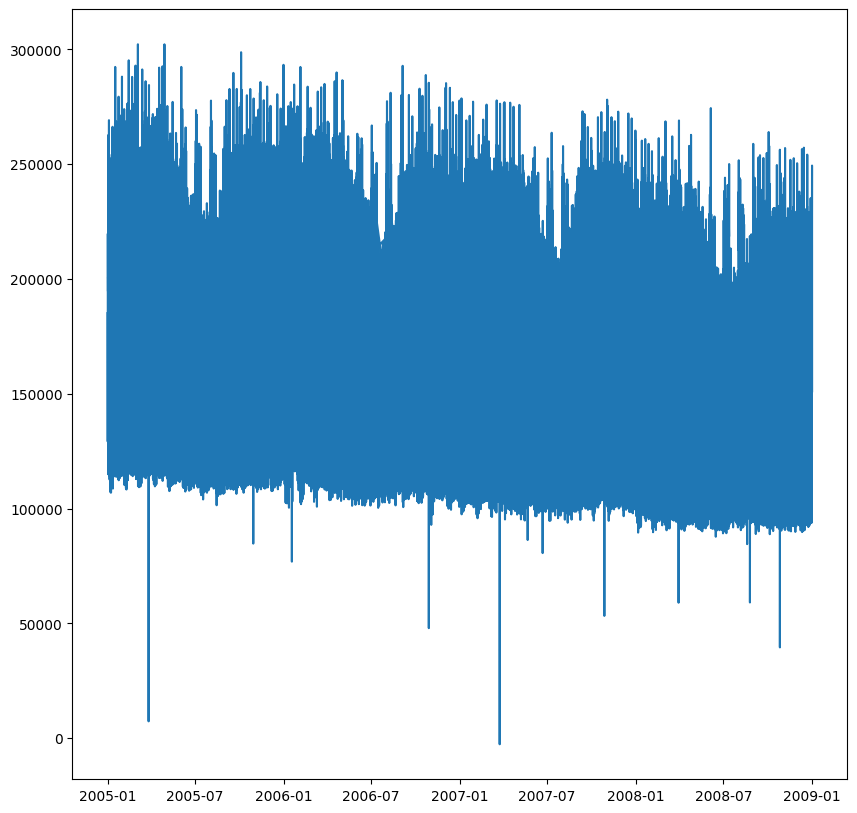

In [285]:
plt.figure(figsize = (10,10))
#plt.bar(df['Year'],df['total'])
plt.plot(df['datetime'],df['total'])

<Axes: >

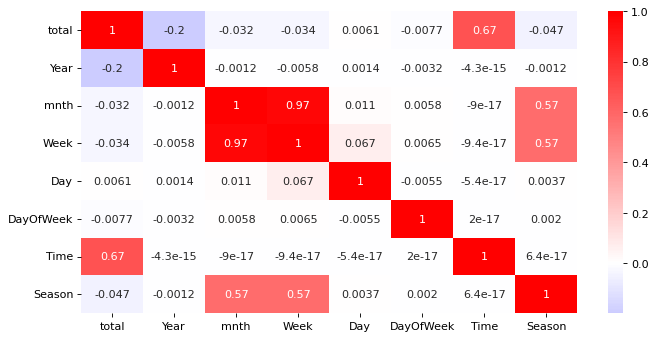

In [ ]:
plt.figure(figsize=(10,5), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='bwr', center=0, annot=True)

<BarContainer object of 35064 artists>

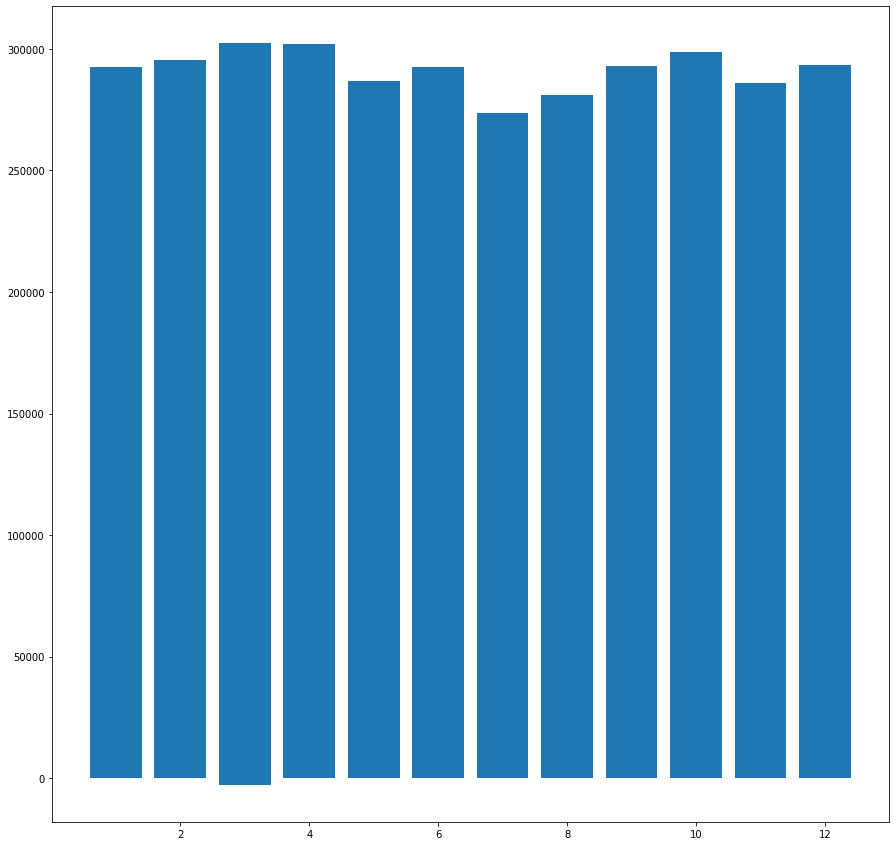

In [ ]:
plt.figure(figsize = (15,15))
plt.bar(df['mnth'],df['total'])

In [248]:
X = df.drop(['datetime','total'],axis = 1)
Y = df['total']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

МЕТРИКИ ЛИНРЕГА

In [211]:
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('R2 score:', r2_score(y_test, pred))

Mean Absolute Error: 25925.291190379558
Mean Squared Error: 1011694285.570389
R2 score: 0.5086879498122663


In [67]:
from sklearn.neighbors import KNeighborsRegressor 

In [212]:
scores = []
for i in range(1,20):
    score = {}
    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test)
    
    score['k'] = i
    score['MSE'] = mean_squared_error(y_test, answers)
    score['MAE'] = mean_absolute_error(y_test, answers)
    score['R2'] = r2_score(y_test, answers)
    
    scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,MSE,MAE,R2
0,1,5.275865e+08,14874.600798,0.743787
1,2,4.046097e+08,13601.628228,0.803508
2,3,3.614772e+08,13025.632719,0.824455
3,4,3.377736e+08,12619.006320,0.835966
4,5,3.179171e+08,12340.659022,0.845609
5,6,3.082497e+08,12202.449779,0.850304
6,7,2.985532e+08,12036.651857,0.855013
7,8,2.905702e+08,11899.705290,0.858890
8,9,2.835731e+08,11775.147602,0.862288
9,10,2.802818e+08,11710.166982,0.863886


In [249]:
modelknn = KNeighborsRegressor(17)
modelknn.fit(X,Y)
prediction = modelknn.predict(X_test)

In [250]:
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test, prediction))

236336130.83747888
10710.037158132305
0.885227394647452


МЕТРИКИ КННА

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
scores = []
for i in range(1,40):
    score = {}
    clf = DecisionTreeRegressor(max_depth=i, random_state=1)
    clf.fit(X_train, y_train)
    answers = clf.predict(X_test)
    
    score['k'] = i
    score['MSE'] = mean_squared_error(y_test, answers)
    score['MAE'] = mean_absolute_error(y_test, answers)
    score['R2'] = r2_score(y_test, answers)
    
    scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,MSE,MAE,R2
0,1,6.436553e+08,20394.497458,0.686948
1,2,5.226041e+08,17822.617069,0.745824
2,3,4.352024e+08,16168.830570,0.788333
3,4,3.804393e+08,14771.595481,0.814968
4,5,3.508255e+08,13797.525515,0.829371
5,6,3.321492e+08,13141.532661,0.838454
6,7,3.147951e+08,12566.774886,0.846895
7,8,3.084713e+08,12311.862296,0.849970
8,9,3.076526e+08,12128.807531,0.850368
9,10,3.061628e+08,12081.393507,0.851093


In [215]:
clf = DecisionTreeRegressor(random_state=1)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

МЕТРИКИ ДЕРЕВА

In [216]:
print(mean_squared_error(y_test,y_pred_tree))
print(mean_absolute_error(y_test,y_pred_tree))
print(r2_score(y_test, y_pred_tree))

389791187.9657051
13157.466873813986
0.8107045671444404


In [264]:
Test=pd.read_csv("/content/drive/MyDrive/sample.csv")
Test

,datetime,total
0,01.01.2009 00:00:00,0
1,01.01.2009 01:00:00,0
2,01.01.2009 02:00:00,0
3,01.01.2009 03:00:00,0
4,01.01.2009 04:00:00,0
...,...,...
4339,30.06.2009 19:00:00,0
4340,30.06.2009 20:00:00,0
4341,30.06.2009 21:00:00,0
4342,30.06.2009 22:00:00,0


In [252]:
Test['total'] = Test['total'].fillna(Test['total'].interpolate('linear'))

In [253]:
Test.isna().sum()

datetime    0
total       0
dtype: int64

In [ ]:
Test['total'] = Test['total'].fillna(Test['total'].mean())

In [254]:
Test['Year'] = pd.to_datetime(Test['datetime']).dt.year

In [255]:
Test['mnth'] = pd.to_datetime(Test['datetime']).dt.month

In [222]:
Test['Day'] = pd.to_datetime(Test['datetime']).dt.day

In [256]:
Test['DayOfWeek'] = pd.to_datetime(Test['datetime']).dt.weekday

In [257]:
Test['Time'] = pd.to_datetime(Test['datetime']).dt.hour

In [258]:
Test['Season'] = Test['mnth']%12//3+1

In [259]:
Test = pd.get_dummies(Test,columns = ['mnth','DayOfWeek','Season'])


In [260]:
Test = Test.drop(['total'],axis = 1)

In [261]:
Test = Test.drop(['datetime'],axis = 1)
Test

,Year,Time,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Season_1,Season_2,Season_3,Season_4
0,2009,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2009,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,2009,2,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2009,3,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2009,4,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,2009,19,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4340,2009,20,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4341,2009,21,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4342,2009,22,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [194]:
Test

,Time,Year_2009,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Season_1,Season_2,Season_3,Season_4
0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,2,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,3,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,4,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,19,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4340,20,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4341,21,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4342,22,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [263]:
answersfinal = clf.predict(Test)

In [ ]:
answersfinal

array([174397.97518193, 140142.44155667, 122751.93140353, ...,
       208984.94582619, 212391.51084235, 198260.48408721])

In [265]:
Test['total'] = answersfinal
Test.to_csv("Test.csv",index = False)

In [262]:
answersfinal2 = modelknn.predict(Test)

In [266]:
Test['total'] = answersfinal2
Test.to_csv("Test2.csv",index = False)

In [ ]:
Test

,datetime,total
0,01.01.2009 00:00:00,174307.839911
1,01.01.2009 01:00:00,139419.098956
2,01.01.2009 02:00:00,121859.538839
3,01.01.2009 03:00:00,109730.959787
4,01.01.2009 04:00:00,105337.285167
...,...,...
4339,30.06.2009 19:00:00,194946.092179
4340,30.06.2009 20:00:00,202236.358243
4341,30.06.2009 21:00:00,210894.838592
4342,30.06.2009 22:00:00,212120.854986
